# Week X - Classification

<hr style="border:2px solid gray">

## Outline:
- [Section One](#section-1): Basics of Classification 
- [Section Two](#section-2): The MNIST Dataset
- [Section Three](#): 

**Keywords:** Classification, 

<hr style="border:2px solid gray">
<a name="section-1"></a>

## Section One: Basics of Classification [^](#outline)

 **Classification** is a process whereby your ML model predicts what cateogry a datapoint should go in. I will talk you through this process and introduce you to some additional features on the way. Much of this is taken from **{homl}**, especially later when we look at the MNIST dataset. 
 
 We will start by looking at one of the most famous datasets in ML, in fact it far predates ML as it goes back to a paper first published in 1936. You can find out more about it from [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set). It describes three different sorts of iris flowers. This data set is great for many things and I would use it a lot more, except that it is quite small. This is so famous that it is actually built in to sklearn! The first step is to import it:

In [3]:
import numpy as np
import scipy as sp 
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
display(iris) #Outputs iris in a nice format

<class 'sklearn.utils._bunch.Bunch'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
print(iris.keys()) #.keys() return the keys of the dictionary as a list

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(iris['DESCR']) #Description of dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

You can see that each data entry has four values; sepal length, sepal width, petal length and petal width. The target/output is an integer from 0 to 2 corresponding to the three different forms of iris.

## Building the Model

Lets start by building a very simple model. We used the kNN algorithm in regression and we will start off with this now in classification (don't forget we need to split into training and testing).

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)  

In [7]:
print(y_train) #Sanity check that all is well (the outputs are between 0 to 2)

[1 1 1 1 0 0 2 2 0 1 2 1 0 1 1 0 0 0 2 2 2 2 1 0 2 1 0 2 2 1 1 2 1 1 0 0 2
 1 0 0 1 2 0 0 2 1 2 1 0 2 2 1 2 0 0 1 0 0 0 0 2 2 1 0 1 0 0 2 0 0 0 0 2 2
 2 1 1 0 1 1 1 0 2 2 2 2 2 1 1 0 1 0 1 2 1 1 1 1 2 1 0 1 2 1 0 0 1 0 0 2 0
 2 2 0 2 0 2 2 2 0]


It is always important to visualize your data, to look for obvious discriminators or strong correlations. As we saw before a pandas scatter matrix is a good way to do this:

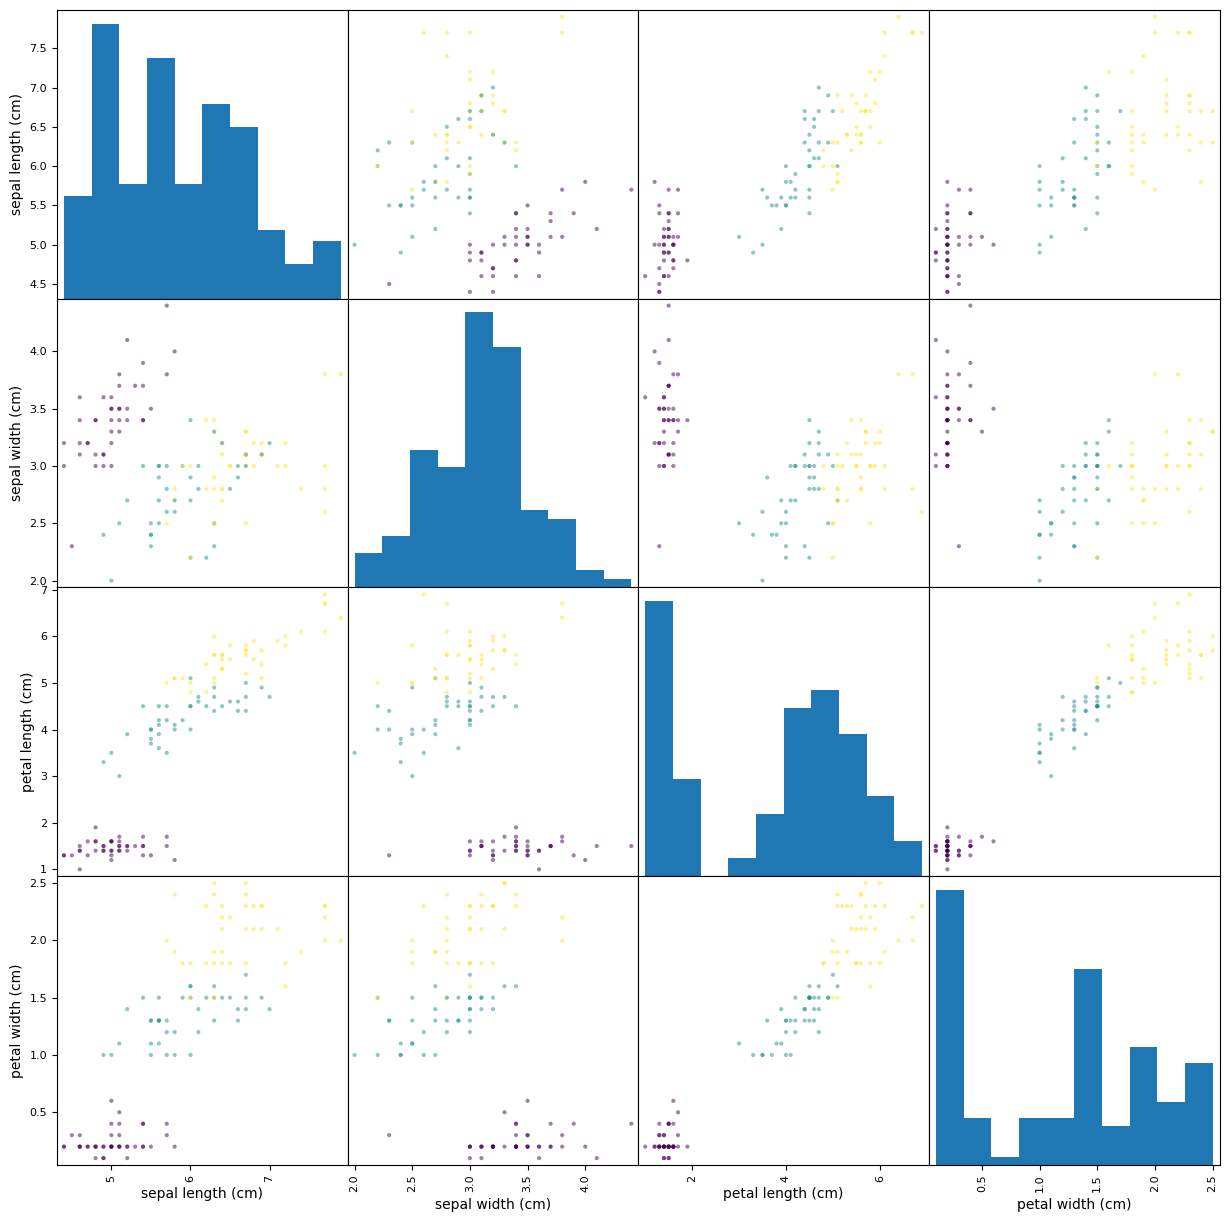

In [8]:
import pandas as pd

df_iris = pd.DataFrame(X_train, columns=iris.feature_names)
pd.plotting.scatter_matrix(df_iris, figsize=(15, 15), c=y_train);

This looks as though there might be some hope of separating them, so lets turn to our old friend the kNN.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 12 #Here we decided to look at the 12 nearest neighbours to classify something
weights = "uniform"
#weights = "distance"
iris_knn = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)

In [11]:
iris_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

Now lets make some predictions and see how well they match the true values:

In [12]:
pred = iris_knn.predict(X_test)

In [13]:
#print(pred)
#print(y_test)
agree = 0
disagree = 0
for i in range(len(pred)): #could easily be a lamda function but just to be explicit
    if pred[i] == y_test[i]: #If the prediction matches the outcome add one to the agree integer
        agree = agree +1
    else:
        disagree = disagree +1

print("Agreeing ", agree)
print("Disagreeing ", disagree)
print("Success fraction", agree/(agree+disagree))

Agreeing  29
Disagreeing  1
Success fraction 0.9666666666666667


<div style="background-color: #C2F5DD">

## Exercise One:

Systematically investigate how well a kNN classifier can work with these data (change the number of neighbours, weighting etc) and present the information. 

<hr style="border:2px solid gray">
<a name="section-2"></a>

## Section Two: The MNIST Dataset [^](#outline)

### Binary Classifiers

Having given you a taste of a full multiclass classifier, I am now going to reduce myself to binary classifiers for a while. Why? Well because for a lot of the history of ML binary classifiers dominated and many of the concepts that I want to get across to you make most sense with binary classifiers. In these classifiers you distinguish between some being something of type X or it not being of type X. The argument was always that you could go on to sub-classify the things that weren't of type X. 

### Cross Validation

Something that we have only touched on so far is *Cross Validation*. In many ML algorithms it was traditional to keep iterating until the results you got on your test sample were "good enough" i.e. better than some threshold. However, this means that in some way your training is also learning your testing sample. 

To get around this, the idea of cross validation came around. This is where you break down the training set into a number of smaller sets called *folds*. You then train your model with all but one of these folds and evaluate with remaining fold. This way you get an array of evaluations (which we will meet this later on in this notebook). Here you keep your testing samples for final validation. 

### The MNIST Dataset

The [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) is probably the most famous in ML. It is a relatively large collection of handwritten numerals, which we will analyse here. **Note:** I was going to write this section myself, but it is so well described in **{homl}** that I have largely taken parts from there.



Lets read in the data:

In [14]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())

/home/kj4718/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [15]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

In [17]:
28 * 28 # these are 28 x 28 pixel images

784

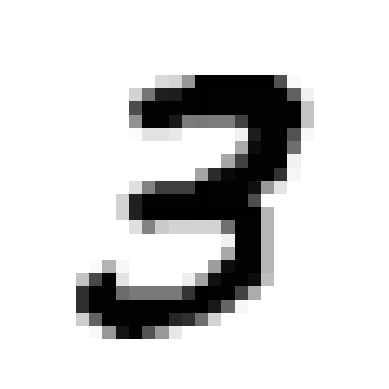

In [18]:
some_digit = X[7] #Just to pick an arbitrary figure. Try a different one
some_digit_image = some_digit.reshape(28, 28) #Reshapes the pixels into 28x28 format
plt.imshow(some_digit_image, cmap=mpl.cm.binary) #cmap is the colour map which spans between 0-100 
plt.axis("off")


plt.show()

In [32]:
y[7] #Checking `the target matches'

3

In [33]:
y = y.astype(np.uint8) #Just setting the file type as unsigned integers for later

3


Now we write a couple of functions to help display the images:

In [21]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest") #This displays an image in which pixels are displayed as a square of multiple pixels
    plt.axis("off")

In [22]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    #This is equivalent to n_rows = ceil(len(instances) / images_per_row), where ceil() is a ceiling function:
    n_rows = (len(instances) - 1) // images_per_row + 1 #This ensures we have an integer

    #Append empty images to fill the end of the grid, if needed (e.g. if we have 17 rows but 15 images, this makes two empty images):
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    #Reshape the array so it's organized as a grid containing 28×28 pixel images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    #Combine axes 0 and 2 (vertical image grid axis, and vertical image axis), and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

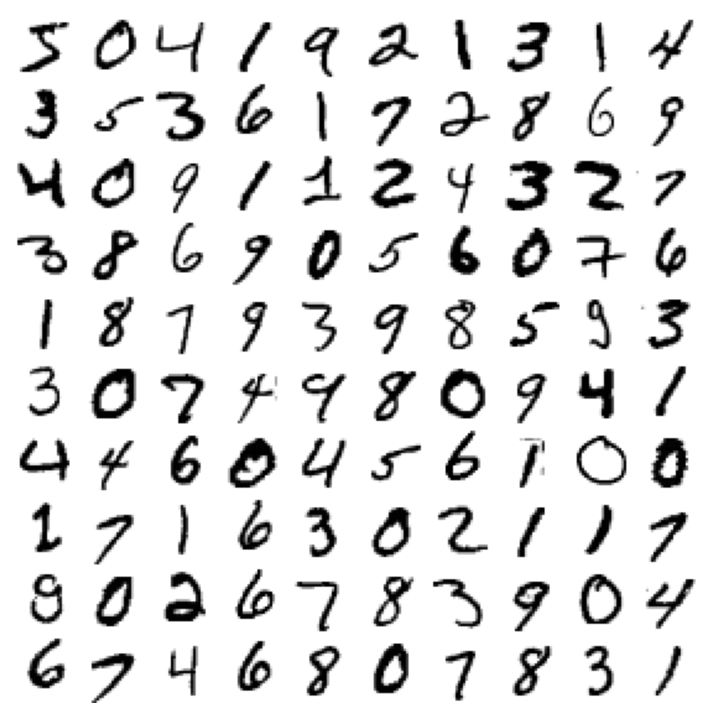

In [24]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

We would normally break the data set up into a training and test set. However, the MNIST people have already done this with the last 10,000 entries being a well shuffled training set so life is made easy for us:

In [25]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Now We Need a Binary Classifier:

OK so we have said that we are going to examine binary classifiers in this section so we need to decide what that is. The simplest one here would be to try to pick out only digit from the possible 10. Following the example in **{homl}** then lets pick the digit 5

In [ ]:
y_train_5 = (y_train == 5) #true if was 5 otherwise false
y_test_5 = (y_test == 5)

In [ ]:
print(y_test_5) 

OK so now we need a binary classifier. There are many that you could use here and you will learn about two very common ones next week. However **{homl}** uses a different one called *Stochastic Gradient Descent*. This is typically good for very large datasets. Lets stick with this one for now.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
print(sgd_clf.predict([some_digit])) # remember that we set this to X[7] easrlier which was 3
print(sgd_clf.predict([X[0]])) # However X[0] was 5

### Performance

So now we need to work how well this works and there are a number of ways of doing this. We could have a look at the test set but lets keep that "clean" so that we can use it for final evaluation at the end.

First lets try cross validation. Remember here we take N folds from the training set and then use all but one fold as training and the remaining one as testing, cycling around until this has happened N times.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") # so this has 3 folds

Wow! More than 95%! However, not so fast. Only roughly 1 in 10 are 5 so even if you had a classifier saying that everything was not true it would be $\approx$ 90% accurate.

## Confusion Matrix

A much more insightful way of looking at this would be to look at how often a 5 was not classified as a 5  (This is called a false negative - FN) or a non-5 as a 5 (false positive -FP) as well how often a 5 was correctly identified (true positive - TP) or a non-5 was correctly identified (true negative - TN).

We are still trying to keep our actual test data "clean" so lets lets use cross validation again. This time rather than cross_val_score we cross_val_predict.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

The top row of this matrix is about the non-5s. It shows that there were 53892 TN and 687 FP (i.e. identified as 5 even though they weren't). The second row is about actual 5. It shows that there were 1891 FN (i.e. not idientified as 5) and 3530 TP.

We can fake what a perfect prediction would look like.

In [ ]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

## Precision and Recall

The confusion matrix gives the information that we need but sometimes it is better expressed as a fraction where you want to know two things:

* What fraction of those identified as 5 really are 5. This is called precision (sometimes, especially in particle physics, purity)

precision=$\dfrac{TP}{TP+FP}$

* What fraction of the true 5s did it select. This is called recall (sometimes, especially in particle physics, efficiency)

recall= $\dfrac{TP}{TP+FN}$

Sklearn can compute these for you.

In [ ]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

## Precision Vs. Recall

Often in your ML environment you will have a choice between recall and precision (efficiency v purity).  

This is not completely obvious in this case but we can look at it. Inside the SGDClassifier it calculates a score and then depending on whether or not that score is above or below a threhold it makes a decision. Changing that threshold would change the precision and recall for this classifier. Sklearn doesn't let you alter the threshold directly, but it does give you access to the decision score. You can do this by calling decision_function rather than predict.

We can then use these values to make our own threshold.



In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred )

How to we decide where we want the threshold? Well the first thing to do is to look at the scores.

We start by using the cross validation again but this time with the decision function.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

Another very important way of visualising this is as a direct trade off between the two:

In [ ]:
(y_train_pred == (y_scores > 0)).all()

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")

plt.show()

## The ROC Curve

Another very common why of viewing performance is the *receiver operating characteristic* curve - ROC curve. The ROC curve plots the TP v the FP.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
#save_fig("roc_curve_plot")                                    # Not shown
plt.show()

One way to compare the performance of different classifiers is to compare the area under the ROC curve (AUC). The closer this is to 1. the better. Let's see for our classifier.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

I can tell you that from my experience that is pretty good!

## Multiclass Classification

You have seen one multiclass classifier today and you will see two more next week. So for now just an exercise...

<div style="background-color: #C2F5DD">

## Exercise Two:

Use the KNN classifier as a multiclass classifier to identify all the digits in the MNIST to best accuracy that you can on the test data (that we haven't yet used). This will require a lot of parameter setting and computing time. You will need to do a grid scan.

As an example for you to follow lets try the iris optimisation (don't forget that MNIST is a lot bigger than iris).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.25)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)